In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#### Example 1

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, criterion='entropy' ,random_state=0)

n_estimators : 
               The number of trees in the forest.
               integer, optional (default=10)

max_depth : 
                The maximum depth of the tree. 
                integer or None, optional (default=None)
                If None, then nodes are expanded until all leaves are pure or until all leaves contain 
                less than min_samples_split samples.

criterion : 
                The function to measure the quality of a split.
                string, optional (default=”gini”)
                Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

In [4]:
clf.fit(X, y);

In [5]:
clf.predict([[0,0,0,0]])

array([0])

In [6]:
clf.predict_proba([[0,0,0,0]])

array([[0.96452381, 0.02585714, 0.00961905]])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
clf.feature_importances_

array([0.0928195 , 0.00759084, 0.4708194 , 0.42877025])

#### Example 2

In [9]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
forest = RandomForestClassifier(criterion='gini' , n_estimators=200 ,random_state=1)

In [12]:
forest.fit(X_train, y_train);

In [13]:
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, marker=markers[idx], label=cl)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc='upper left')

Score:  0.9904761904761905


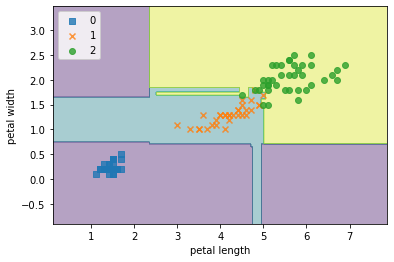

In [14]:
plot_decision_regions(X_train, y_train,classifier=forest)
print('Score: ', forest.score(X_train, y_train) )

Score:  0.9777777777777777


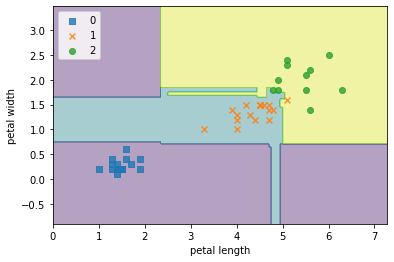

In [15]:
plot_decision_regions(X_test, y_test,classifier=forest)
print('Score: ', forest.score(X_test, y_test) )